<a href="https://colab.research.google.com/github/dR0ski/MIT-Food-CNN/blob/main/Food_Data_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#------------------------------------------------------------------------------
#
#------------------------------------------------------------------------------
nl = "\n"
ln = "--------------------------------------------------------------------------"
tb = "\t"

#------------------------------------------------------------------------------
# Importing the drive functionality from Google.Colab
#------------------------------------------------------------------------------
print("---> Commence Loading Google Drive")
from google.colab import drive
drive.mount('/content/drive')
print("---> Google Drive Mounted Successfully")



---> Commence Loading Google Drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
---> Google Drive Mounted Successfully


In [ ]:
pathZip = '/content/Food_Data.zip'

In [ ]:
# Imports the required data and ML libraries
# ------------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
from tensorflow.keras import backend
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import losses, optimizers
from tensorflow.keras.preprocessing.image import load_img # opens image file from directory
from google.colab.patches import cv2_imshow

print(f"""---> Import completed for the following data & ML libraries:
  - numpy as np
  - matplotlib.pyplot as plt
  - os
  - zipfile
  - pandas as pd
  - seaborn as sns
  - cv2
  - tensorflow as tf
  - keras

FROM TENSORFLOW, THE BELOW WERE IMPORTED
  - Sequential, Model
  - Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
  - backend
  - to_categorical
  - Adam, SGD, RMSprop
  - EarlyStopping, ModelCheckpoint
  - losses, optimizers
  - cv2_imshow
""")

---> Import completed for the following data & ML libraries:
  - numpy as np
  - matplotlib.pyplot as plt
  - os
  - zipfile
  - pandas as pd
  - seaborn as sns
  - cv2
  - tensorflow as tf
  - keras

FROM TENSORFLOW, THE BELOW WERE IMPORTED
  - Sequential, Model
  - Dense, Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU, Dropout, Flatten
  - backend
  - to_categorical
  - Adam, SGD, RMSprop
  - EarlyStopping, ModelCheckpoint
  - losses, optimizers
  - cv2_imshow



In [ ]:
# Unzips file
# ------------------------------------------------------------------------------
with zipfile.ZipFile(pathZip, 'r') as zip_ref:
    zip_ref.extractall()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Food_Data.zip'

In [ ]:
DATADIR = '/content/Food_Data/Training' # Path to training data set
CATEGORIES = ['Bread', 'Soup', 'Vegetable-Fruit'] # Folders within the data set under the training folder
IMG_SIZE = 150 # Set Image Size, such that our system doesnt run out of memory



In [ ]:
# ------------------------------------------------------------------------------
# LOADING DATA : TRAINING DATA SET
# ------------------------------------------------------------------------------
# Brute force approach for loading training data
# ------------------------------------------------------------------------------
print(f"Brute force approach for loading training data{nl}{ln}{nl}")

training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = category

    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img)) # Read each image file in the directory that is in focus
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resize each image to 150X150 pixels to save space in memory
      training_data.append([new_array, class_num]) # Append the image and it's category to the 'training_data' python list

  return training_data



Brute force approach for loading training data
------------------------------------------------------------------------------



In [ ]:
training_data = create_training_data()

In [ ]:
training_data[0]

[array([[[ 44, 136, 215],
         [ 45, 140, 218],
         [ 37, 138, 213],
         ...,
         [ 10, 110, 164],
         [ 17, 134, 189],
         [  9, 138, 191]],
 
        [[ 38, 132, 208],
         [ 42, 138, 213],
         [ 41, 139, 215],
         ...,
         [  8, 109, 164],
         [ 15, 131, 188],
         [ 13, 142, 197]],
 
        [[ 37, 136, 210],
         [ 41, 138, 214],
         [ 46, 140, 216],
         ...,
         [ 24, 129, 186],
         [ 21, 139, 196],
         [ 10, 137, 192]],
 
        ...,
 
        [[  9,  39,  94],
         [ 13,  44,  98],
         [  0,  27,  82],
         ...,
         [  9,  29,  60],
         [  0,  21,  56],
         [  6,  33,  70]],
 
        [[  2,  33,  92],
         [ 11,  43, 102],
         [ 12,  41, 101],
         ...,
         [  2,  23,  55],
         [  7,  32,  66],
         [  0,  26,  63]],
 
        [[  0,  32,  95],
         [ 22,  57, 121],
         [  8,  42, 106],
         ...,
         [  5,  27,  58],
  

In [ ]:
training_data[0][0].shape

(150, 150, 3)

In [ ]:
# ------------------------------------------------------------------------------
# LOADING DATA : TETSTING DATA SET
# ------------------------------------------------------------------------------
# Brute force approach for loading testing data
# ------------------------------------------------------------------------------
DATADIR_test = '/content/Food_Data/Testing' # Path to training data set

# Creating Testing Data
# ------------------------------------------------------------------------------

print(f"Creating Testing Data{nl}{ln}{nl}")

testing_data = []

def create_testing_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = category

    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path, img)) # Read each image file in the directory that is in focus
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # Resize each image to 150X150 pixels to save space in memory
      testing_data.append([new_array, class_num]) # Append the image and it's category to the 'training_data' python list

  return testing_data




Creating Testing Data
------------------------------------------------------------------------------



In [ ]:
testing_data = create_testing_data()

**Bread**


In [ ]:
# ------------------------------------------------------------------------------
# VISUALIZING DATA: TRAINING DATA SET
# ------------------------------------------------------------------------------
# Function that takes a numpy array as input
# ------------------------------------------------------------------------------
def visualize_data_plt_figure(image_category, dir_position_num):
  """
  Fucntion takes an input of image_category which is a numpy array
  """
  fig = plt.figure(figsize=(10,10))
  for i in range(9):
    ax = fig.add_subplot(4,3, i+1)
    fp = f'{DATADIR}/{CATEGORIES[dir_position_num]}/{image_category[i]}'

    fn = load_img(fp, target_size = (150,150))
    plt.imshow(fn,)
    plt.axis('off')



Bread List Length: 994
------------------------------------------------------------------------------



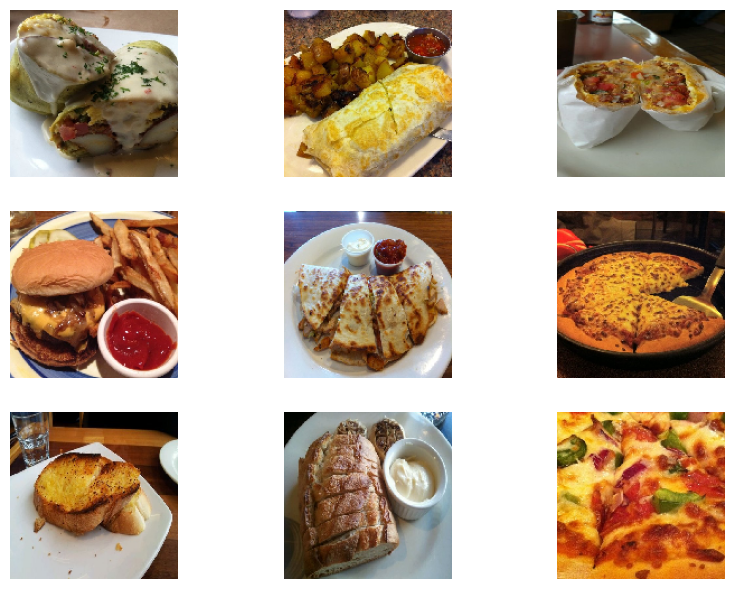

In [ ]:
# ------------------------------------------------------------------------------
# Stores the names of image files for bread into a Python list call bread_imgs
# ------------------------------------------------------------------------------
bread_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[0]}")]
# ------------------------------------------------------------------------------
# Prints the length of the soup_imgs list
# ------------------------------------------------------------------------------
print(f"Bread List Length: {len(bread_imgs)}{nl}{ln}{nl}")

# ------------------------------------------------------------------------------
# Loads bread filenames into a numpy array
# Select nine (9) random breads
# ------------------------------------------------------------------------------
select_bread = np.random.choice(bread_imgs, 9, replace=False)
select_bread

# ------------------------------------------------------------------------------
# VISUALIZING BREAD DATA: TRAINING DATA SET
# ------------------------------------------------------------------------------
# Calls the visualization function and passes in the bread numpy array for vis.
# ------------------------------------------------------------------------------
visualize_data_plt_figure(select_bread, 0)


Soup List Length: 1500
------------------------------------------------------------------------------

Soup Array of Names: 
------------------------------------------------------------------------------
['1150.jpg' '1474.jpg' '112.jpg' '1316.jpg' '412.jpg' '911.jpg' '765.jpg'
 '787.jpg' '536.jpg']
------------------------------------------------------------------------------



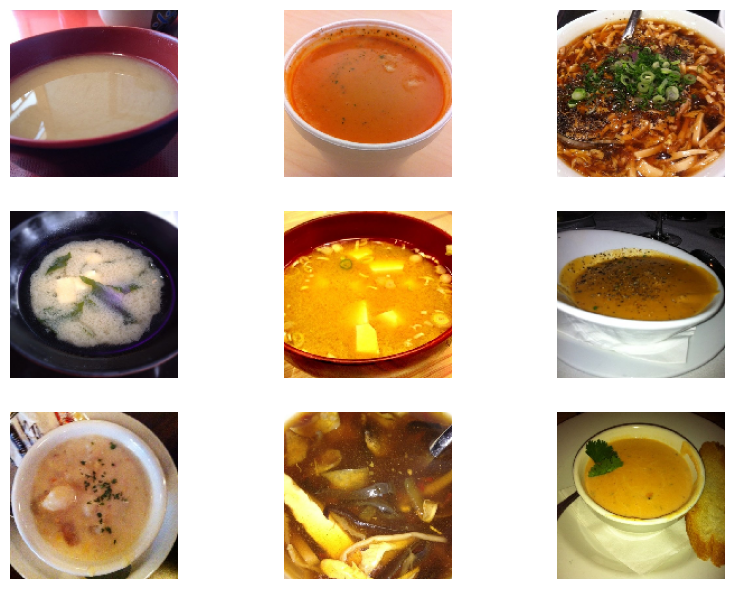

In [ ]:
# ------------------------------------------------------------------------------
# Loads Soup image names into a python list called soup_imgs
# ------------------------------------------------------------------------------
soup_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[1]}")]

# ------------------------------------------------------------------------------
# Prints the length of the soup_imgs list
# ------------------------------------------------------------------------------
print(f"Soup List Length: {len(soup_imgs)}{nl}{ln}{nl}")

# Loads bread filenames into a numpy array
# Select nine (9) random breads
select_soups = np.random.choice(soup_imgs, 9, replace=False)
print(f"Soup Array of Names: {nl}{ln}{nl}{select_soups}{nl}{ln}{nl}")
select_soups
# ------------------------------------------------------------------------------
# VISUALIZING SOUP DATA: TRAINING DATA SET
# ------------------------------------------------------------------------------
# Calls the visualization function and passes in the soups numpy array for vis.
# ------------------------------------------------------------------------------
visualize_data_plt_figure(select_soups, 1)


FRUITS & VEGETABLE List Length: 709
------------------------------------------------------------------------------

Soup Array of Names: 
------------------------------------------------------------------------------
['89.jpg' '69.jpg' '350.jpg' '254.jpg' '136.jpg' '677.jpg' '202.jpg'
 '444.jpg' '347.jpg']
------------------------------------------------------------------------------



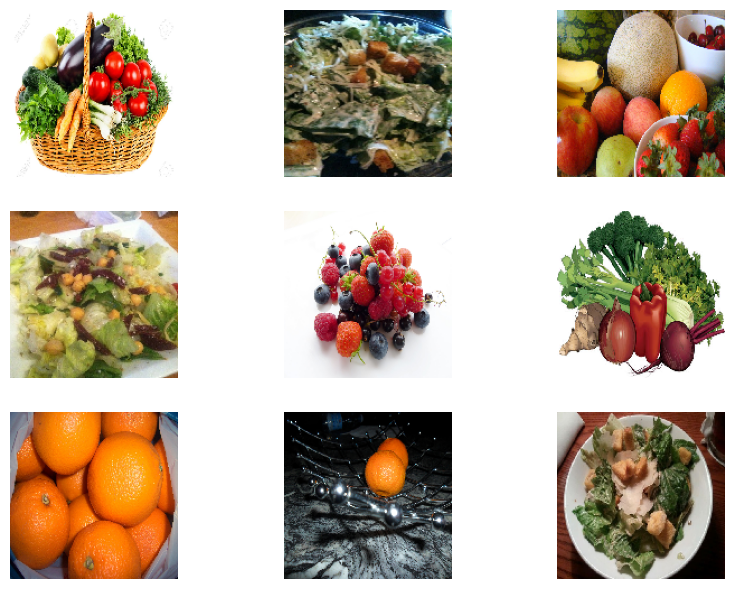

In [ ]:
# ------------------------------------------------------------------------------
# Loads Soup image names into a python list called soup_imgs
# ------------------------------------------------------------------------------
fruits_veg_imgs = [fn for fn in os.listdir(f"{DATADIR}/{CATEGORIES[2]}")]

# ------------------------------------------------------------------------------
# Prints the length of the soup_imgs list
# ------------------------------------------------------------------------------
print(f"FRUITS & VEGETABLE List Length: {len(fruits_veg_imgs)}{nl}{ln}{nl}")

# Loads bread filenames into a numpy array
# Select nine (9) random breads
select_fruits_veg = np.random.choice(fruits_veg_imgs, 9, replace=False)
print(f"Soup Array of Names: {nl}{ln}{nl}{select_fruits_veg}{nl}{ln}{nl}")
# ------------------------------------------------------------------------------
# VISUALIZING SOUP DATA: TRAINING DATA SET
# ------------------------------------------------------------------------------
# Calls the visualization function and passes in the soups numpy array for vis.
# ------------------------------------------------------------------------------
visualize_data_plt_figure(select_fruits_veg, 2)


In [ ]:
# ------------------------------------------------------------------------------
# SPLITTING THE DATA SET FUNCTION
# ------------------------------------------------------------------------------
# Function that takes a numpy array as input
# ------------------------------------------------------------------------------

def split_data_along_axis(nmpy_data_array):
  """
  Function takes a numpy array that contains imgs and labels
  """
  try:
    # Holds values for the x axis from the training data set
    x_axis_values = []

    # Holds values for the y axis from the training data set
    y_axis_values = []

    # ------------------------------------------------------------------------------
    # Shuffle training data in a numpy array
    # ------------------------------------------------------------------------------
    np.random.shuffle(nmpy_data_array)

    # ------------------------------------------------------------------------------
    # Loads images to the x axis & labels to the y axis
    # ------------------------------------------------------------------------------

    for img, label in nmpy_data_array:
      x_axis_values.append(img)
      y_axis_values.append(label)

    x_axis_values = np.array(x_axis_values)
    y_axis_values = np.array(y_axis_values)

    return {"x_axis": x_axis_values, "y_axis": y_axis_values}

  except Exception as splitting_error:
    print({"Splitting_Error": splitting_error})




In [ ]:
# ------------------------------------------------------------------------------
# SPLITTING THE TRAINING DATA SET
# ------------------------------------------------------------------------------
t_data = split_data_along_axis(training_data)
x_train = t_data["x_axis"]
y_train = t_data["y_axis"]

print(f"Training Data X Axis Shape: {x_train.shape}{nl}Training Data Y Axis Shape: {y_train.shape}")


Training Data X Axis Shape: (3203, 150, 150, 3)
Training Data Y Axis Shape: (3203,)


In [ ]:
# ------------------------------------------------------------------------------
# SPLITTING THE TEST DATA SET
# ------------------------------------------------------------------------------
tst_data = split_data_along_axis(testing_data)
x_tst = tst_data["x_axis"]
y_tst = tst_data["y_axis"]

print(f"Testing Data X Axis Shape: {x_tst.shape}{nl}Testing Data Y Axis Shape: {y_tst.shape}")


Testing Data X Axis Shape: (3203, 150, 150, 3)
Testing Data Y Axis Shape: (3203,)
